In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()

# Compare Nucleotide vs Protein K-mers

Also compare jaccard vs containment for evolpath comparisons?

In [2]:
ep = pd.read_csv("gtdb-rs202.evolpaths.all.csv.gz")
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_ident,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.926776,0.942109
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.928150,0.943416
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.927531,0.943375
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689328,0.701284
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721482,0.734246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589657,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,100,0.001703,0.003699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592279,0.596669
589658,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200
589659,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,1,0.000687,0.001424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547567,0.549325
589660,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,100,0.000427,0.000885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524458,0.526113


In [3]:
ep[(ep["path"]== "path1") & (ep["alpha-ksize"] == "protein-10") & (ep["scaled"] == 1)]

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_ident,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani
108,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,10,1,0.218082,0.539267,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.876631,0.908372
111,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,10,1,0.013696,0.042670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675469,0.702474
114,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,10,1,0.001719,0.006086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546805,0.573598
117,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,protein,10,1,0.001794,0.006552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548485,0.576659
120,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,protein,10,1,0.000518,0.001456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490320,0.505350
123,GCA_004524385.1_x_GCF_000023945.1,GCA_004524385.1,GCF_000023945.1,path1,superkingdom,protein,10,1,0.000206,0.000572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.447489,0.460717


In [4]:
# steps from common ancestor
steps_dict = {"genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom":6}

In [5]:
ep.loc[:, "steps"] = ep["lowest_common_rank"].map(steps_dict)

In [6]:
ep[(ep["path"]== "path1") & (ep["alpha-ksize"] == "protein-10") & (ep["scaled"] == 1)]

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
108,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,10,1,0.218082,0.539267,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.876631,0.908372,1
111,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,10,1,0.013696,0.042670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675469,0.702474,2
114,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,10,1,0.001719,0.006086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546805,0.573598,3
117,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,protein,10,1,0.001794,0.006552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548485,0.576659,4
120,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,protein,10,1,0.000518,0.001456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490320,0.505350,5
123,GCA_004524385.1_x_GCF_000023945.1,GCA_004524385.1,GCF_000023945.1,path1,superkingdom,protein,10,1,0.000206,0.000572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.447489,0.460717,6


In [16]:
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.926776,0.942109,1
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.928150,0.943416,1
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.927531,0.943375,1
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689328,0.701284,2
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721482,0.734246,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589657,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,100,0.001703,0.003699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592279,0.596669,5
589658,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200,5
589659,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,1,0.000687,0.001424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547567,0.549325,6
589660,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,100,0.000427,0.000885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524458,0.526113,6


In [7]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard_ani',
       'jani_low', 'jani_high', 'containA_ani', 'containAani_low',
       'containAani_high', 'containBani', 'containBani_low',
       'containBani_high', 'mcANI', 'mcANI_low', 'mcANI_high', 'alpha-ksize',
       'compareM_mean_aai', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb_ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm_ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani_ident',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'min_containment_ani', 'avg_containment_ani', 'steps'],
      dtype='object')

In [8]:
ep["alpha-ksize"].unique()

array(['nucleotide-21', 'nucleotide-31', 'nucleotide-51', 'protein-7',
       'protein-8', 'protein-9', 'protein-10', 'protein-11'], dtype=object)

In [78]:
sns.color_palette("Blues", 9)

[(0.8917339484813533, 0.9351018838908112, 0.9753940792003075),
 (0.8141176470588235, 0.883921568627451, 0.9498039215686275),
 (0.7161860822760477, 0.8332026143790849, 0.916155324875048),
 (0.5796078431372549, 0.7701960784313725, 0.8737254901960784),
 (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.1791464821222607, 0.49287197231833907, 0.7354248366013072),
 (0.09019607843137256, 0.39294117647058824, 0.6705882352941177),
 (0.03137254901960784, 0.2897347174163783, 0.570319108035371)]

In [79]:
blues=sns.color_palette("Blues", 10)
blues_hex = blues.as_hex()[4:]

In [80]:
prot_order = ["protein-7", "protein-8", "protein-9", "protein-10", "protein-11"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
alphak_order = nucl_order + prot_order
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
# greens
#protein_colors = {"protein-7": "#a1d99b", "protein-8": "#299617", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
# blues
protein_colors = dict(zip(prot_order, blues_hex))


alphak_colors.update(nucl_colors)
alphak_colors.update(protein_colors)

In [10]:
# are zeroes an issue?
print(len(ep[ep["jaccard"] == 0]))

104954


In [11]:
# how many 100% jaccard do we have?
print(len(ep[ep["jaccard"] == 1]))

0


In [12]:
# how many 100% max_containment do we have?
print(len(ep[ep["max_containment"] == 1]))

0


In [13]:
# replace zeroes with np.nan
cols = ["jaccard", "anchor_containment", "compare_containment", "max_containment"]
ep[cols] = ep[cols].replace({0:np.nan})

In [14]:
print(len(ep[ep["jaccard"] == 0]))

0


In [15]:
# start with scaled 1
sc1 = ep[ep['scaled']== 1]
sc1.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.926776,0.942109,1
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689328,0.701284,2
6,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1,0.000094,0.000321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.653969,0.667866,3
9,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1,0.000067,0.000237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.672010,0.672010,4
12,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1,0.000008,0.000022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [21]:
# simplify df a bit to make this faster
cols_to_drop = ['jaccard_ani',
       'jani_low', 'jani_high', 'containA_ani', 'containAani_low',
       'containAani_high', 'containBani', 'containBani_low',
       'containBani_high', 'mcANI', 'mcANI_low', 'mcANI_high',
       'compareM_mean_aai', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb_ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm_ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani_ident',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'min_containment_ani', 'avg_containment_ani']

sc1.drop(columns=cols_to_drop, inplace=True)

/Users/tessa/opt/miniconda3/envs/2021-rank-compare-nb/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


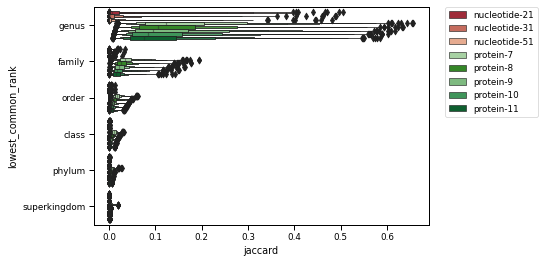

In [27]:
#plot jaccard across evolpaths
g=sns.boxenplot(data=sc1, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, hue_order=alphak_order, order=rankorder)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#fig = g.get_figure()
#fig.savefig("gtdb-rs202.evolpaths.jaccard.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.jaccard.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [28]:
sc1['alpha-ksize'].unique()

array(['nucleotide-21', 'nucleotide-31', 'nucleotide-51', 'protein-7',
       'protein-8', 'protein-9', 'protein-10', 'protein-11'], dtype=object)

In [29]:
select_ak = ['nucleotide-21', 'nucleotide-31', 'nucleotide-51', 'protein-7', 'protein-10']

In [30]:
sc1_k710 = sc1[sc1["alpha-ksize"].isin(select_ak)]

Text(0.5, 0, 'Jaccard')

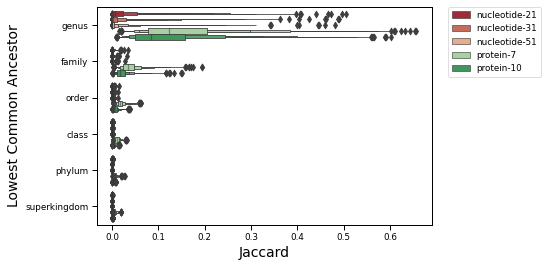

In [36]:
g=sns.boxenplot(data=sc1_k710, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Lowest Common Ancestor", size=14)
plt.xlabel("Jaccard", size=14)

Text(0, 0.5, 'Jaccard')

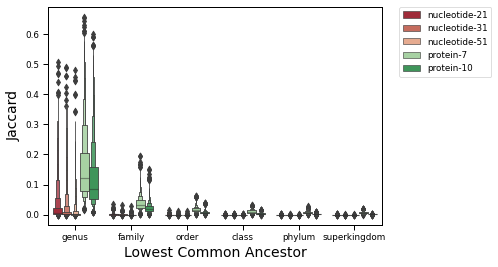

In [37]:
g=sns.boxenplot(data=sc1_k710, x="lowest_common_rank", y="jaccard", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Lowest Common Ancestor", size=14)
plt.ylabel("Jaccard", size=14)

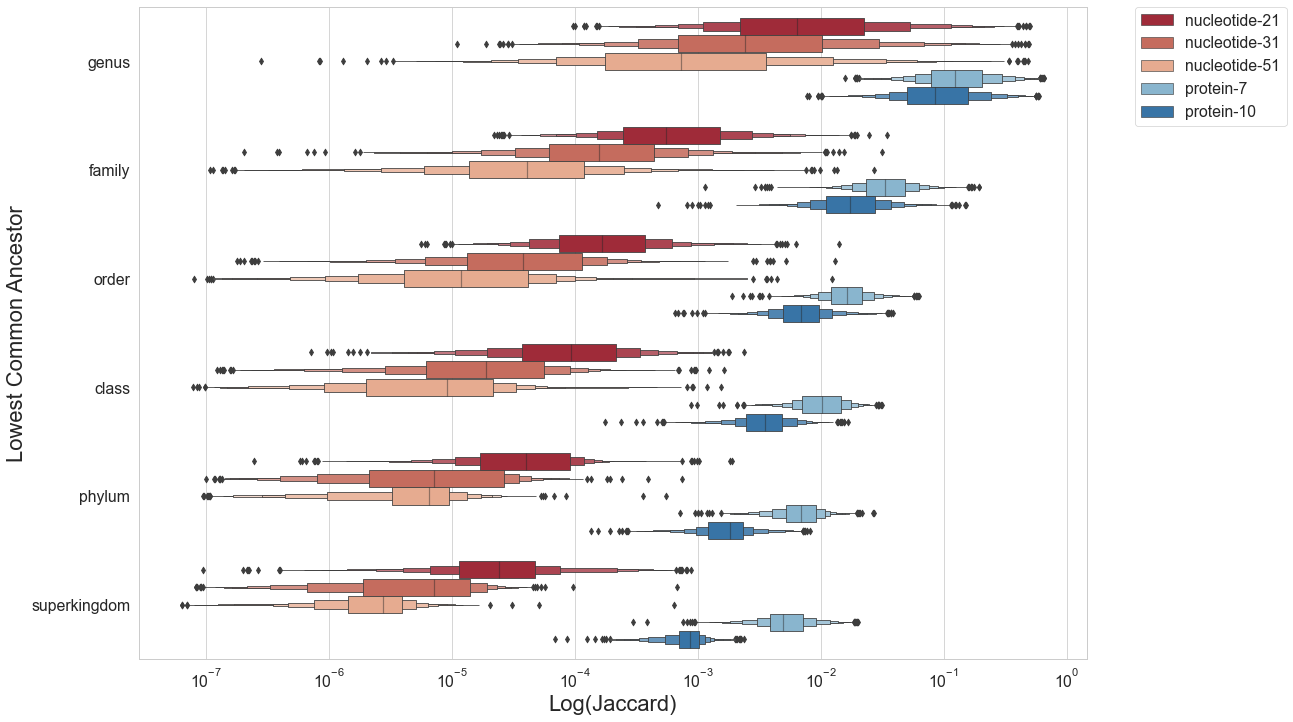

In [100]:
#plot jaccard across evolpaths -- log scale
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=sc1_k710, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("Log(Jaccard)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.scaled1.jaccard.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.scaled1.jaccard.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [39]:
# select standard scaled vals

default_scaled_nucl = ep[(ep["alphabet"] == "nucleotide") & (ep['scaled']== 1000)]
default_scaled_prot = ep[(ep["alphabet"] == "protein") & (ep['scaled']== 200)]


In [40]:
default_scaled_nucl

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.928150,0.943416,1
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721482,0.734246,2
7,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
10,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
13,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589558,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,nucleotide,51,1000,0.000148,0.000305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852269,0.852735,2
589561,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,nucleotide,51,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
589564,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,nucleotide,51,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
589567,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,nucleotide,51,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [41]:
default_scaled_prot

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
56,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844570,0.888084,1
59,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,200,0.027002,0.081731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628554,0.663897,2
62,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,7,200,0.006650,0.022837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.512570,0.547684,3
65,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,protein,7,200,0.006931,0.024840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.514339,0.552090,4
68,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,protein,7,200,0.003355,0.009215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472382,0.492157,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589649,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,protein,11,200,0.025401,0.050129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760156,0.760965,2
589652,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,protein,11,200,0.004919,0.010802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.651343,0.656952,3
589655,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,11,200,0.001313,0.003271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573046,0.583710,4
589658,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200,5


In [43]:
default_scaled = pd.concat([default_scaled_nucl,default_scaled_prot])
default_scaled

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.928150,0.943416,1
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721482,0.734246,2
7,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
10,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
13,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589649,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,protein,11,200,0.025401,0.050129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760156,0.760965,2
589652,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,protein,11,200,0.004919,0.010802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.651343,0.656952,3
589655,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,11,200,0.001313,0.003271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573046,0.583710,4
589658,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200,5


In [46]:
default_scaled_selectk = default_scaled[default_scaled["alpha-ksize"].isin(select_ak)]

Text(0, 0.5, 'Jaccard')

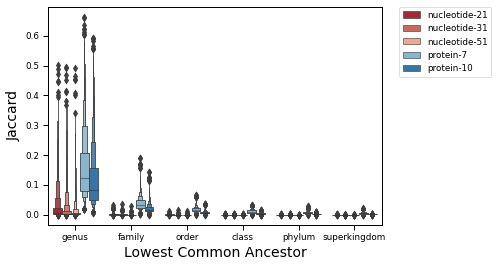

In [84]:
g=sns.boxenplot(data=default_scaled_selectk, x="lowest_common_rank", y="jaccard", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Lowest Common Ancestor", size=14)
plt.ylabel("Jaccard", size=14)

Text(0.5, 0, 'Jaccard')

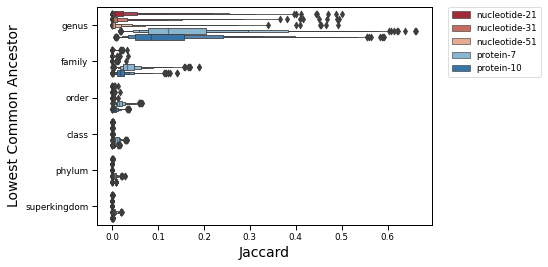

In [85]:
g=sns.boxenplot(data=default_scaled_selectk, y="lowest_common_rank", x="jaccard", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Lowest Common Ancestor", size=14)
plt.xlabel("Jaccard", size=14)

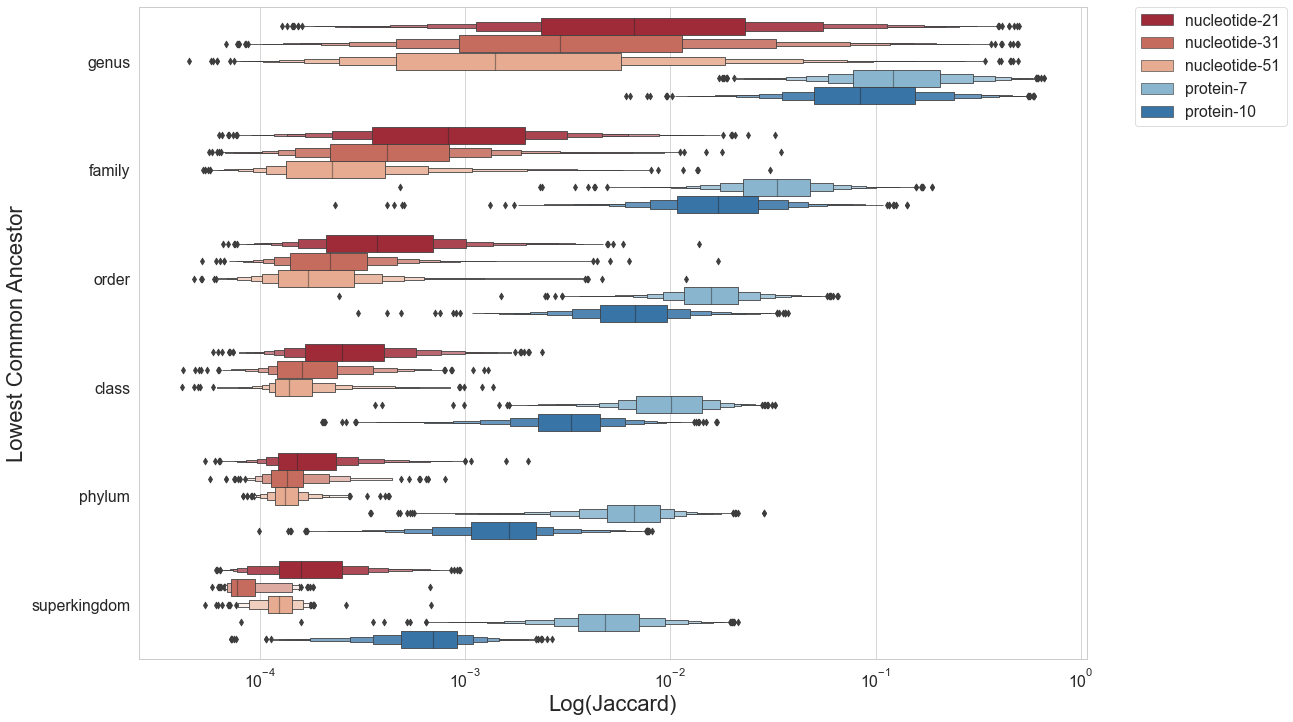

In [99]:
#plot jaccard across evolpaths -- log scale
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=default_scaled_selectk, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("Log(Jaccard)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.jaccard.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.jaccard.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Text(0.5, 0, 'Log(max containment)')

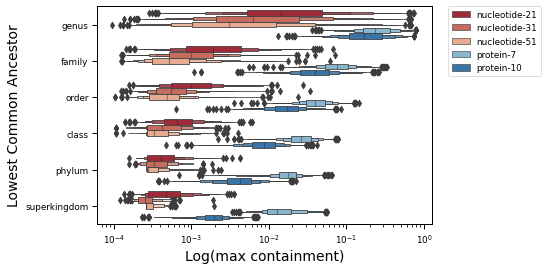

In [86]:
g=sns.boxenplot(data=default_scaled_selectk, x="max_containment", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
g.set(xscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Lowest Common Ancestor", size=14)
plt.xlabel("Log(max containment)", size=14)

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments,min_containment_ani,avg_containment_ani,steps
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.928150,0.943416,1
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721482,0.734246,2
7,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
10,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
13,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589631,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,protein,10,200,0.023628,0.046553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.734632,0.735246,2
589634,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,protein,10,200,0.005211,0.011631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626739,0.633650,3
589637,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587161,0.599336,4
589640,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.561532,0.565705,5


In [ ]:

#sns.set() # reset defaults
#with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
#    sns.set_style("whitegrid")
#    g=sns.boxenplot(data=dna21_melt, y="lowest_common_rank", x="ANI", 
#                     hue="estimator", order=rankorder, dodge=True, palette=ani_colors)
#    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#    # plot vertical line at 80% ANI    
#    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
#    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
#    g.set(xlim=(0.52, 1))
#    # format x ticks as %
#    plt.gcf().set_size_inches(11, 7)
#   # g.set(xlim=(0, 1))
#    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#    g.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
#    plt.xlabel("ANI (%)", size=20, labelpad=15)
#    plt.ylabel("Lowest Common Taxon", size=25)
#    fig = g.get_figure()
   # fig.savefig("gtdb95-evolpaths.ANIcompare.k21.boxen.png",bbox_inches='tight')
   # fig.savefig("gtdb95-evolpaths.ANIcompare.k21.boxen.pdf",bbox_inches='tight')